# IMPORT THE LIBRARIES

In [1]:
import glob
import nltk
import re
import multiprocessing
from gensim.models.phrases import Phraser, Phrases
from gensim.models import Word2Vec, FastText

C:\Users\DELL\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# LOAD THE TEXTS

In [2]:
book_names = sorted(glob.glob("C:/Users/DELL/Downloads/BiltzAI-Linkedin-nlp engineer job-task/HarryPotterData/*.txt"))
book_names

["C:/Users/DELL/Downloads/BiltzAI-Linkedin-nlp engineer job-task/HarryPotterData\\Book 1 - The Philosopher's Stone.txt",
 'C:/Users/DELL/Downloads/BiltzAI-Linkedin-nlp engineer job-task/HarryPotterData\\Book 2 - The Chamber of Secrets.txt',
 'C:/Users/DELL/Downloads/BiltzAI-Linkedin-nlp engineer job-task/HarryPotterData\\Book 3 - The Prisoner of Azkaban.txt',
 'C:/Users/DELL/Downloads/BiltzAI-Linkedin-nlp engineer job-task/HarryPotterData\\Book 4 - The Goblet of Fire.txt',
 'C:/Users/DELL/Downloads/BiltzAI-Linkedin-nlp engineer job-task/HarryPotterData\\Book 5 - The Order of the Phoenix.txt',
 'C:/Users/DELL/Downloads/BiltzAI-Linkedin-nlp engineer job-task/HarryPotterData\\Book 6 - The Half Blood Prince.txt',
 'C:/Users/DELL/Downloads/BiltzAI-Linkedin-nlp engineer job-task/HarryPotterData\\Book 7 - The Deathly Hallows.txt']

# CREATE ONE STRING TOGETHER

In [3]:
import codecs

In [4]:
raw_corpus = u""  # will use utf-8
for filename in book_names:
    print("Reading {}...".format(filename.split("/")[1]))
    with codecs.open(filename,"r","utf-8") as book:
        raw_corpus += book.read() 
    print("Corpus now is {} characters and {} words long".format(len(raw_corpus), len(raw_corpus.split())))
    print("~"*30)

Reading Users...
Corpus now is 489689 characters and 83188 words long
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Reading Users...
Corpus now is 1038157 characters and 175356 words long
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Reading Users...
Corpus now is 1736640 characters and 291977 words long
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Reading Users...
Corpus now is 2961434 characters and 498134 words long
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Reading Users...
Corpus now is 4619662 characters and 774697 words long
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Reading Users...
Corpus now is 5711076 characters and 957058 words long
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Reading Users...
Corpus now is 6976209 characters and 1168853 words long
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [5]:
raw_corpus[:5000]

'/ \r\n\r\n\r\n\r\n\r\nTHE BOY WHO LIVED \r\n\r\nMr. and Mrs. Dursley, of number four, Privet Drive, \r\nwere proud to say that they were perfectly normal, \r\nthank you very much. They were the last people you’d \r\nexpect to be involved in anything strange or \r\nmysterious, because they just didn’t hold with such \r\nnonsense. \r\n\r\nMr. Dursley was the director of a firm called \r\nGrunnings, which made drills. He was a big, beefy \r\nman with hardly any neck, although he did have a \r\nvery large mustache. Mrs. Dursley was thin and \r\nblonde and had nearly twice the usual amount of \r\nneck, which came in very useful as she spent so \r\nmuch of her time craning over garden fences, spying \r\non the neighbors. The Dursley s had a small son \r\ncalled Dudley and in their opinion there was no finer \r\nboy anywhere. \r\n\r\nThe Dursleys had everything they wanted, but they \r\nalso had a secret, and their greatest fear was that \r\nsomebody would discover it. They didn’t think they

# TOKENISATION(CORPUS INTO SENTENCES)

In [6]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences = tokenizer.tokenize(raw_corpus)


In [7]:
def sentence_to_words(sentence):
    # remove non leter characters
    cleaned_sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    
    # convert sentence to words
    words = cleaned_sentence.lower().split()
    
    return words
words_corpus = []



In [8]:
# for now let's leave only words and don't remove stop words
for sentence in sentences:
    if len(sentence) > 0:
        words_corpus.append(sentence_to_words(sentence))


In [9]:
tokens_number = sum([len(sub_corpus) for sub_corpus in words_corpus])
print('The words corpus contains {0:,} tokens'.format(tokens_number))

The words corpus contains 1,174,677 tokens


In [10]:
print(words_corpus[:5])

[['the', 'boy', 'who', 'lived', 'mr', 'and', 'mrs', 'dursley', 'of', 'number', 'four', 'privet', 'drive', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal', 'thank', 'you', 'very', 'much'], ['they', 'were', 'the', 'last', 'people', 'you', 'd', 'expect', 'to', 'be', 'involved', 'in', 'anything', 'strange', 'or', 'mysterious', 'because', 'they', 'just', 'didn', 't', 'hold', 'with', 'such', 'nonsense'], ['mr', 'dursley', 'was', 'the', 'director', 'of', 'a', 'firm', 'called', 'grunnings', 'which', 'made', 'drills'], ['he', 'was', 'a', 'big', 'beefy', 'man', 'with', 'hardly', 'any', 'neck', 'although', 'he', 'did', 'have', 'a', 'very', 'large', 'mustache'], ['mrs', 'dursley', 'was', 'thin', 'and', 'blonde', 'and', 'had', 'nearly', 'twice', 'the', 'usual', 'amount', 'of', 'neck', 'which', 'came', 'in', 'very', 'useful', 'as', 'she', 'spent', 'so', 'much', 'of', 'her', 'time', 'craning', 'over', 'garden', 'fences', 'spying', 'on', 'the', 'neighbors']]


# FEATURE EXTRACTION

### USING WORD2Vec (Define parameter for building Word2Vec model)

In [11]:
from gensim.models import Word2Vec, FastText
import gensim.models.word2vec as w2v

In [12]:
# train word2vec model
w2v = Word2Vec(words_corpus, min_count=3, vector_size = 300)
print(w2v)
#Word2Vec(vocab=19, size=5, alpha=0.025)

Word2Vec(vocab=11762, vector_size=300, alpha=0.025)


In [13]:
len(w2v.wv.index_to_key)

11762

In [14]:
#list the vocabulary words
words = list(w2v.wv.index_to_key)
print(words)

['the', 'and', 'to', 'of', 'harry', 'he', 'a', 'was', 's', 'you', 'it', 'said', 'his', 'i', 'in', 'that', 'had', 'at', 't', 'as', 'on', 'him', 'they', 'with', 'ron', 'but', 'potter', 'for', 'her', 'not', 'hermione', 'she', 'what', 'page', 'k', 'j', 'rowling', 'be', 'out', 'up', 'all', 'were', 'them', 'have', 'from', 'we', 'there', 'into', 'dumbledore', 'who', 'been', 'this', 'back', 'so', 'is', 'me', 'could', 'no', 'now', 'if', 'then', 'an', 'one', 'their', 'know', 'about', 'over', 'like', 'down', 'looked', 'when', 'do', 'just', 'would', 'did', 'around', 'by', 'your', 've', 'got', 'very', 'd', 'well', 'hagrid', 'can', 'are', 'professor', 'my', 'don', 'again', 'see', 'more', 're', 'off', 'snape', 'though', 'how', 'looking', 'think', 'time', 'still', 'get', 'wand', 'right', 'eyes', 'or', 'weasley', 'll', 'face', 'through', 'which', 'going', 'before', 'here', 'voice', 'look', 'go', 'where', 'didn', 'than', 'm', 'will', 'room', 'only', 'order', 'come', 'malfoy', 'too', 'head', 'door', 'tho

# BUILD A VOCAB

# (Reqirements)

+You are given all the parts of the Harry Potter Novel Series in form of text files within SemanticSearchData.zip. Your task is to build a module which provides following functionalities

+ An ability to search for any Harry Potter Novel characters, and the search result would include two components
  + First one is called **RelatedConcepts**: In this section of the search results you'll get all other words or pair of words closer to the search term
    + Ex: If you search for let's say "Harry Potter", then the **RelatedConcepts** would be a list of top 20 concepts that are close to Harry Potter like [Hermione Granger, Lord Voldermort, Rubeus Hagrid,........]
  
+ Secondly, you need to provide the book name and list of page numbers of those pages which has the search term.
    + Ex: Since your search term is Harry Potter, you need to get all the page numbers in all 7 books where this word is mentioned.


# WORDEMBEDDING(1.SKIP GRAM)

In [15]:
import time
import os

In [16]:
if not os.path.exists("trained"):
    os.makedirs("trained")

In [17]:
start = time.time()
w2v_sg = Word2Vec(sentences=sentences, vector_size=300, window=7, min_count=3,  sg=1, )
print("Training Word2Vec Skip-Gram took {} seconds".format(time.time()-start))

Training Word2Vec Skip-Gram took 76.90946626663208 seconds


In [18]:
w2v_sg.save(os.path.join("trained", "w2v_sg.bin"))

# WORDEMBEDDING(2.CBOW)

In [19]:
if not os.path.exists("trained"):
    os.makedirs("trained")

In [20]:
import time
import os

In [21]:
start = time.time()
w2v_cbow = Word2Vec(sentences=sentences, vector_size=300, window=7, min_count=3, sg=0)
print("Training Word2Vec CBOW took {} seconds".format(time.time()-start))

Training Word2Vec CBOW took 26.81607961654663 seconds


In [22]:
w2v_cbow.save(os.path.join("trained", "w2v_cbow.bin"))

# Exploring the trained models


# Semantic similarities

In [23]:
sim_words = w2v.wv.most_similar('harry')
sim_words

[('he', 0.5778084397315979),
 ('then', 0.5266252160072327),
 ('again', 0.5262117981910706),
 ('cedric', 0.49453580379486084),
 ('neville', 0.48666349053382874),
 ('sirius', 0.48649999499320984),
 ('ron', 0.4834810197353363),
 ('cho', 0.4800364077091217),
 ('hagrid', 0.4709523320198059),
 ('james', 0.44995009899139404)]

In [24]:
sim_words = w2v.wv.most_similar('harmony')
sim_words

[('ny', 0.9405346512794495),
 ('ruined', 0.9357870817184448),
 ('horrific', 0.9334726929664612),
 ('parked', 0.9303171038627625),
 ('delicious', 0.9298262000083923),
 ('hitherto', 0.9264476895332336),
 ('feasts', 0.923762321472168),
 ('lads', 0.9237027168273926),
 ('thieves', 0.9232540726661682),
 ('battling', 0.921265184879303)]

In [25]:
sim_words = w2v.wv.most_similar('e')
sim_words

[('w', 0.9141235947608948),
 ('n', 0.8759115934371948),
 ('p', 0.8634803295135498),
 ('defeating', 0.7450096607208252),
 ('g', 0.7277078032493591),
 ('edgecombe', 0.7189302444458008),
 ('l', 0.7146116495132446),
 ('underage', 0.7054542303085327),
 ('uncanny', 0.7043067216873169),
 ('felix', 0.70409095287323)]

In [26]:
sim_words = w2v.wv.most_similar('tonight')
sim_words

[('today', 0.7747734785079956),
 ('home', 0.7741281390190125),
 ('unless', 0.7632846832275391),
 ('win', 0.7611616253852844),
 ('tomorrow', 0.7586256861686707),
 ('discuss', 0.7554688453674316),
 ('plan', 0.7491259574890137),
 ('job', 0.7432869672775269),
 ('lessons', 0.7345579862594604),
 ('detention', 0.7329620718955994)]

# (reducing dimensions to 2-D for plotting, using T-SNE)

In [27]:
from sklearn.manifold import TSNE

In [28]:
tsne = TSNE(n_components=2, random_state=42)

In [29]:
word_vectors = w2v.wv.vectors

In [30]:
start = time.time()
word_vectors_2d = tsne.fit_transform(word_vectors)
print("Reducing dimensions to 2-D using T-SNE took {} seconds".format(time.time()-start))

Reducing dimensions to 2-D using T-SNE took 243.39575839042664 seconds


In [31]:
%%time

all_word_vectors_matrix_2d = tsne.fit_transform(word_vectors)

Wall time: 3min 49s


# (PLOT THE PICTURE)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [45]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=20).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
     # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    

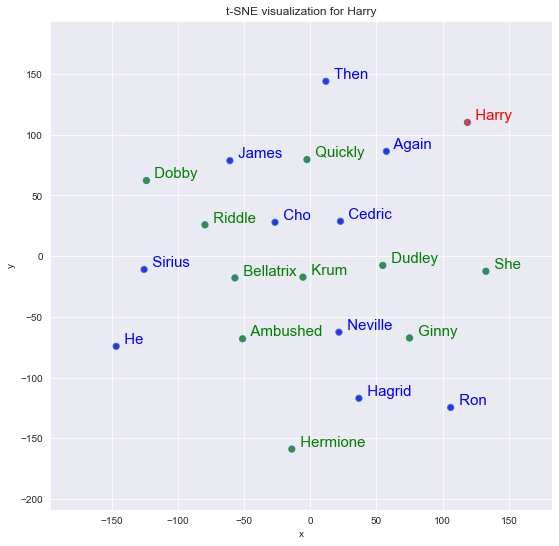

In [50]:
tsnescatterplot(w2v, 'harry',[t[0] for t in w2v.wv.most_similar(positive=["harry"], topn=20)][10:])

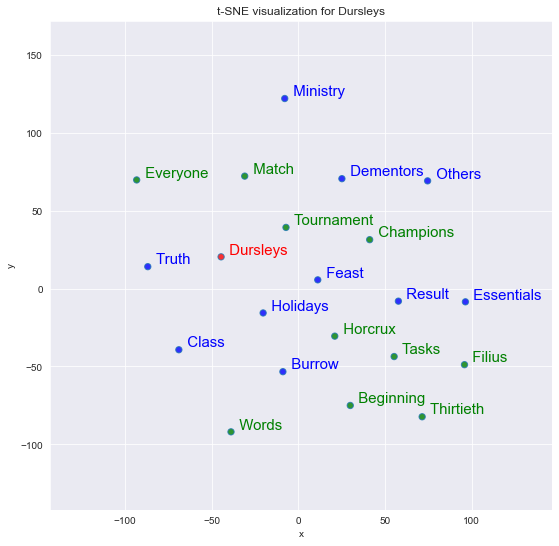

In [51]:
tsnescatterplot(w2v, 'dursleys',[t[0] for t in w2v.wv.most_similar(positive=["dursleys"], topn=20)][10:])

# MODEL SAVING

In [52]:
import pickle

# saving the model 
pickle_out = open("HarryPotterW2V.pkl", mode = "wb") 
pickle.dump(w2v_sg, pickle_out) 
pickle_out.close()